In [1]:
import pandas as pd

In [ ]:
## stb analyze

vgg19_res_path = 'D:/res-bagnet/stb-vgg19-pretrained/test.log'
vgg19bn_res_path = 'D:/res-bagnet/stb-vgg19_bn-pretrained/test.log'
resnet50_res_path = 'D:/res-bagnet/stb-resnet50-pretrained/test.log'
bagnet33_res_path = 'D:/res-bagnet/stb-bagnet33-pretrained/test.log'
fusion_res_path = 'D:/res-bagnet/stb-fusion/test.log'

vgg19_res = []
with open(vgg19_res_path, 'r') as f:
    for i, line in enumerate(f.readlines()):
        line = line[15:].split('\t')
        if 'Final' in line[0]:
            continue
        if i != 0:
            line[2:5] = list(map(float, line[2:5]))
            line[0] = line[0].replace("('D:\\\\dataset\\\\ShanghaiTech\\\\part_B\\\\test_data/images\\\\", "").replace(".jpg',)", "").replace("IMG_", "")
        vgg19_res.append(line)

vgg19bn_res = []
with open(vgg19bn_res_path, 'r') as f:
    for i, line in enumerate(f.readlines()):
        line = line[15:].split('\t')
        if 'Final' in line[0]:
            continue
        if i != 0:
            line[2:5] = list(map(float, line[2:5]))
            line[0] = line[0].replace("('D:\\\\dataset\\\\ShanghaiTech\\\\part_B\\\\test_data/images\\\\", "").replace(".jpg',)", "").replace("IMG_", "")
        vgg19bn_res.append(line)

resnet50_res = []
with open(resnet50_res_path, 'r') as f:
    for i, line in enumerate(f.readlines()):
        line = line[15:].split('\t')
        if 'Final' in line[0]:
            continue
        if i != 0:
            line[2:5] = list(map(float, line[2:5]))
            line[0] = line[0].replace("('D:\\\\dataset\\\\ShanghaiTech\\\\part_B\\\\test_data/images\\\\", "").replace(".jpg',)", "").replace("IMG_", "")
        resnet50_res.append(line)

bagnet33_res = []
with open(bagnet33_res_path, 'r') as f:
    for i, line in enumerate(f.readlines()):
        line = line[15:].split('\t')
        if 'Final' in line[0]:
            continue
        if i != 0:
            line[2:5] = list(map(float, line[2:5]))
            line[0] = line[0].replace("('D:\\\\dataset\\\\ShanghaiTech\\\\part_B\\\\test_data/images\\\\", "").replace(".jpg',)", "").replace("IMG_", "")
        bagnet33_res.append(line)

fusion_res = []
with open(fusion_res_path, 'r') as f:
    for i, line in enumerate(f.readlines()):
        line = line[15:].split('\t')
        if 'Final' in line[0]:
            continue
        if i != 0:
            line[2:5] = list(map(float, line[2:5]))
            line[0] = line[0].replace("('/mnt/hdd02/ShanghaiTech/part_B/test_data/images/", "").replace(".jpg',)", "").replace("IMG_", "")
        fusion_res.append(line)

vgg19_df = pd.DataFrame(vgg19_res[1:], columns=['path', 'itr', 'diff', 'gt_num', 'estimate'])
vgg19bn_df = pd.DataFrame(vgg19bn_res[1:], columns=['path', 'itr', 'diff', 'gt_num', 'estimate'])
resnet50_df = pd.DataFrame(resnet50_res[1:], columns=['path', 'itr', 'diff', 'gt_num', 'estimate'])
bagnet33_df = pd.DataFrame(bagnet33_res[1:], columns=['path', 'itr', 'diff', 'gt_num', 'estimate'])
fusion_df = pd.DataFrame(fusion_res[1:], columns=['path', 'itr_fusion', 'diff_fusion', 'gt_num_fusion', 'estimate_fusion'])

vgg_unit_df = pd.merge(vgg19_df, vgg19bn_df, on='path', suffixes=['_vgg19', '_vgg19_bn'])
res_unit_df = pd.merge(resnet50_df, bagnet33_df, on='path', suffixes=['_resnet50', '_bagnet33'])
res_unit_df = pd.merge(res_unit_df, fusion_df, on='path')
unit_df = pd.merge(vgg_unit_df, res_unit_df, on='path')

sorted_unit_df = unit_df.sort_values('gt_num_vgg19')
sorted_unit_df = sorted_unit_df.drop(['itr_vgg19', 'itr_vgg19_bn', 'itr_resnet50', 'itr_bagnet33', 'itr_fusion'], axis='columns')
sorted_unit_df = sorted_unit_df.drop(['gt_num_vgg19_bn', 'gt_num_resnet50', 'gt_num_bagnet33', 'gt_num_fusion'], axis='columns')
sorted_unit_df = sorted_unit_df.rename(columns={'gt_num_vgg19': 'People Number'})

estimate_unit_df = sorted_unit_df.drop(['path', 'diff_vgg19_bn', 'diff_vgg19', 'diff_resnet50', 'diff_bagnet33', 'diff_fusion'], axis='columns')
diff_unit_df = sorted_unit_df.drop(['path', 'estimate_vgg19_bn', 'estimate_vgg19', 'estimate_resnet50', 'estimate_bagnet33', 'estimate_fusion'], axis='columns')

# ax = diff_unit_df.plot(x='People Number', ylabel='Error', figsize=(20, 6), ylim=[-100, 100], xlim=[0, 550])
# ax.hlines(0, 0, 550, color="black")
# ax.grid(b=True, which='major', axis='y')

diff_unit_df = diff_unit_df.abs()
ax = diff_unit_df.plot.line(x='People Number', ylabel='Error', style='o-', figsize=(20, 6), ylim=[0, 100], xlim=[0, 550])
ax.hlines(0, 0, 550, color="black")
ax.grid(b=True, which='major', axis='y')

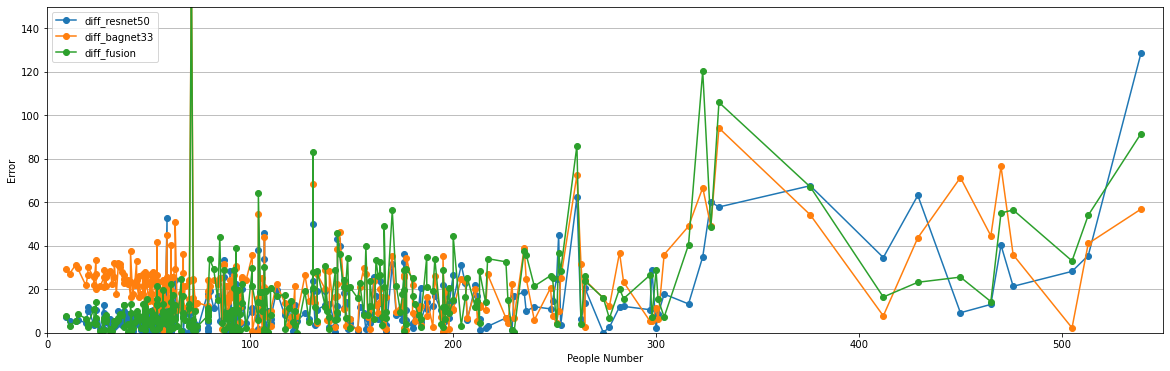

In [2]:
## stb analyze

resnet50_res_path = 'D:/res-bagnet/stb-resnet50-pretrained/test.log'
bagnet33_res_path = 'D:/res-bagnet/stb-bagnet33-pretrained/test.log'
fusion_res_path = 'D:/res-bagnet/stb-fusion/test.log'

resnet50_res = []
with open(resnet50_res_path, 'r') as f:
    for i, line in enumerate(f.readlines()):
        line = line[15:].split('\t')
        if 'Final' in line[0]:
            continue
        if i != 0:
            line[2:5] = list(map(float, line[2:5]))
            line[0] = line[0].replace("('D:\\\\dataset\\\\ShanghaiTech\\\\part_B\\\\test_data/images\\\\", "").replace(".jpg',)", "").replace("IMG_", "")
        resnet50_res.append(line)

bagnet33_res = []
with open(bagnet33_res_path, 'r') as f:
    for i, line in enumerate(f.readlines()):
        line = line[15:].split('\t')
        if 'Final' in line[0]:
            continue
        if i != 0:
            line[2:5] = list(map(float, line[2:5]))
            line[0] = line[0].replace("('D:\\\\dataset\\\\ShanghaiTech\\\\part_B\\\\test_data/images\\\\", "").replace(".jpg',)", "").replace("IMG_", "")
        bagnet33_res.append(line)

fusion_res = []
with open(fusion_res_path, 'r') as f:
    for i, line in enumerate(f.readlines()):
        line = line[15:].split('\t')
        if 'Final' in line[0]:
            continue
        if i != 0:
            line[2:5] = list(map(float, line[2:5]))
            line[0] = line[0].replace("('/mnt/hdd02/ShanghaiTech/part_B/test_data/images/", "").replace(".jpg',)", "").replace("IMG_", "")
        fusion_res.append(line)

resnet50_df = pd.DataFrame(resnet50_res[1:], columns=['path', 'itr', 'diff', 'gt_num', 'estimate'])
bagnet33_df = pd.DataFrame(bagnet33_res[1:], columns=['path', 'itr', 'diff', 'gt_num', 'estimate'])
fusion_df = pd.DataFrame(fusion_res[1:], columns=['path', 'itr_fusion', 'diff_fusion', 'gt_num_fusion', 'estimate_fusion'])

res_unit_df = pd.merge(resnet50_df, bagnet33_df, on='path', suffixes=['_resnet50', '_bagnet33'])
unit_df = pd.merge(res_unit_df, fusion_df, on='path')

sorted_unit_df = unit_df.sort_values('gt_num_resnet50')
sorted_unit_df = sorted_unit_df.drop(['itr_resnet50', 'itr_bagnet33', 'itr_fusion'], axis='columns')
sorted_unit_df = sorted_unit_df.drop(['gt_num_bagnet33', 'gt_num_fusion'], axis='columns')
sorted_unit_df = sorted_unit_df.rename(columns={'gt_num_resnet50': 'People Number'})

diff_unit_df = sorted_unit_df.drop(['path', 'estimate_resnet50', 'estimate_bagnet33', 'estimate_fusion'], axis='columns')

# ax = diff_unit_df.plot(x='People Number', ylabel='Error', figsize=(20, 6), ylim=[-100, 100], xlim=[0, 550])
# ax.hlines(0, 0, 550, color="black")
# ax.grid(b=True, which='major', axis='y')

diff_unit_df = diff_unit_df.abs()
ax = diff_unit_df.plot.line(x='People Number', ylabel='Error', style='o-', figsize=(20, 6), ylim=[0, 150], xlim=[0, 550])
#ax.hlines(0, 0, 550, color="black")
ax.grid(b=True, which='major', axis='y')

In [ ]:
## sta analyze

vgg19_res_path = 'D:/res-bagnet/sta-vgg19-pretrained/test.log'
vgg19bn_res_path = 'D:/res-bagnet/sta-vgg19_bn-pretrained/test.log'
resnet50_res_path = 'D:/res-bagnet/sta-resnet50-pretrained/test.log'
bagnet33_res_path = 'D:/res-bagnet/sta-bagnet33-pretrained/test.log'

vgg19_res = []
with open(vgg19_res_path, 'r') as f:
    for i, line in enumerate(f.readlines()):
        line = line[15:].split('\t')
        if 'Final' in line[0]:
            continue
        if i != 0:
            line[2:5] = list(map(float, line[2:5]))
            line[0] = line[0].replace("('D:\\\\dataset\\\\ShanghaiTech\\\\part_A\\\\test_data/images\\\\", "").replace(".jpg',)", "").replace("IMG_", "")
        vgg19_res.append(line)

vgg19bn_res = []
with open(vgg19bn_res_path, 'r') as f:
    for i, line in enumerate(f.readlines()):
        line = line[15:].split('\t')
        if 'Final' in line[0]:
            continue
        if i != 0:
            line[2:5] = list(map(float, line[2:5]))
            line[0] = line[0].replace("('D:\\\\dataset\\\\ShanghaiTech\\\\part_A\\\\test_data/images\\\\", "").replace(".jpg',)", "").replace("IMG_", "")
        vgg19bn_res.append(line)

resnet50_res = []
with open(resnet50_res_path, 'r') as f:
    for i, line in enumerate(f.readlines()):
        line = line[15:].split('\t')
        if 'Final' in line[0]:
            continue
        if i != 0:
            line[2:5] = list(map(float, line[2:5]))
            line[0] = line[0].replace("('D:\\\\dataset\\\\ShanghaiTech\\\\part_A\\\\test_data/images\\\\", "").replace(".jpg',)", "").replace("IMG_", "")
        resnet50_res.append(line)

bagnet33_res = []
with open(bagnet33_res_path, 'r') as f:
    for i, line in enumerate(f.readlines()):
        line = line[15:].split('\t')
        if 'Final' in line[0]:
            continue
        if i != 0:
            line[2:5] = list(map(float, line[2:5]))
            line[0] = line[0].replace("('D:\\\\dataset\\\\ShanghaiTech\\\\part_A\\\\test_data/images\\\\", "").replace(".jpg',)", "").replace("IMG_", "")
        bagnet33_res.append(line)

vgg19_df = pd.DataFrame(vgg19_res[1:], columns=['path', 'itr', 'diff', 'gt_num', 'estimate'])
vgg19bn_df = pd.DataFrame(vgg19bn_res[1:], columns=['path', 'itr', 'diff', 'gt_num', 'estimate'])
resnet50_df = pd.DataFrame(resnet50_res[1:], columns=['path', 'itr', 'diff', 'gt_num', 'estimate'])
bagnet33_df = pd.DataFrame(bagnet33_res[1:], columns=['path', 'itr', 'diff', 'gt_num', 'estimate'])

vgg_unit_df = pd.merge(vgg19_df, vgg19bn_df, on='path', suffixes=['_vgg19', '_vgg19_bn'])
res_unit_df = pd.merge(resnet50_df, bagnet33_df, on='path', suffixes=['_resnet50', '_bagnet33'])
unit_df = pd.merge(vgg_unit_df, res_unit_df, on='path')

sorted_unit_df = unit_df.sort_values('gt_num_vgg19')
sorted_unit_df = sorted_unit_df.drop(['itr_vgg19', 'itr_vgg19_bn', 'itr_resnet50', 'itr_bagnet33'], axis='columns')
sorted_unit_df = sorted_unit_df.drop(['gt_num_vgg19_bn', 'gt_num_resnet50', 'gt_num_bagnet33'], axis='columns')
sorted_unit_df = sorted_unit_df.rename(columns={'gt_num_vgg19': 'People Number'})
estimate_unit_df = sorted_unit_df.drop(['path','diff_vgg19_bn', 'diff_vgg19', 'diff_resnet50', 'diff_bagnet33'], axis='columns')
diff_unit_df = sorted_unit_df.drop(['path', 'estimate_vgg19_bn', 'estimate_vgg19', 'estimate_resnet50', 'estimate_bagnet33' , 'diff_vgg19_bn', 'diff_vgg19'], axis='columns')
#estimate_unit_df.plot(x=estimate_unit_df.columns[1], ylabel='Error', figsize=(26, 10))
#estimate_unit_df.plot(figsize=(26, 10))
ax = diff_unit_df.plot(x='People Number', ylabel='Error', figsize=(20, 6), xlim=[0, 2300])
ax.hlines(0, 0, 2300, color="black")
ax.grid(b=True, which='major', axis='y')

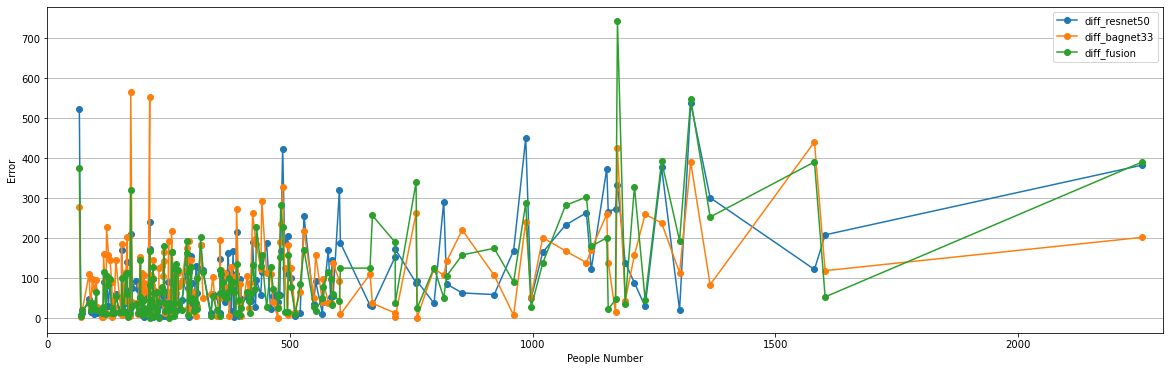

In [9]:
## sta analyze

resnet50_res_path = 'D:/res-bagnet/sta-resnet50-pretrained/test.log'
bagnet33_res_path = 'D:/res-bagnet/sta-bagnet33-pretrained/test.log'
fusion_res_path = 'D:/res-bagnet/sta-fusion/test.log'

resnet50_res = []
with open(resnet50_res_path, 'r') as f:
    for i, line in enumerate(f.readlines()):
        line = line[15:].split('\t')
        if 'Final' in line[0]:
            continue
        if i != 0:
            line[2:5] = list(map(float, line[2:5]))
            line[0] = line[0].replace("('D:\\\\dataset\\\\ShanghaiTech\\\\part_A\\\\test_data/images\\\\", "").replace(".jpg',)", "").replace("IMG_", "")
        resnet50_res.append(line)

bagnet33_res = []
with open(bagnet33_res_path, 'r') as f:
    for i, line in enumerate(f.readlines()):
        line = line[15:].split('\t')
        if 'Final' in line[0]:
            continue
        if i != 0:
            line[2:5] = list(map(float, line[2:5]))
            line[0] = line[0].replace("('D:\\\\dataset\\\\ShanghaiTech\\\\part_A\\\\test_data/images\\\\", "").replace(".jpg',)", "").replace("IMG_", "")
        bagnet33_res.append(line)

fusion_res = []
with open(fusion_res_path, 'r') as f:
    for i, line in enumerate(f.readlines()):
        line = line[15:].split('\t')
        if 'Final' in line[0]:
            continue
        if i != 0:
            line[2:5] = list(map(float, line[2:5]))
            line[0] = line[0].replace("('/mnt/hdd02/ShanghaiTech/part_A/test_data/images/", "").replace(".jpg',)", "").replace("IMG_", "")
        fusion_res.append(line)

resnet50_df = pd.DataFrame(resnet50_res[1:], columns=['path', 'itr', 'diff', 'gt_num', 'estimate'])
bagnet33_df = pd.DataFrame(bagnet33_res[1:], columns=['path', 'itr', 'diff', 'gt_num', 'estimate'])
fusion_df = pd.DataFrame(fusion_res[1:], columns=['path', 'itr_fusion', 'diff_fusion', 'gt_num_fusion', 'estimate_fusion'])

res_unit_df = pd.merge(resnet50_df, bagnet33_df, on='path', suffixes=['_resnet50', '_bagnet33'])
unit_df = pd.merge(res_unit_df, fusion_df, on='path')

sorted_unit_df = unit_df.sort_values('gt_num_resnet50')
sorted_unit_df = sorted_unit_df.drop(['itr_resnet50', 'itr_bagnet33', 'itr_fusion'], axis='columns')
sorted_unit_df = sorted_unit_df.drop(['gt_num_bagnet33', 'gt_num_fusion'], axis='columns')
sorted_unit_df = sorted_unit_df.rename(columns={'gt_num_resnet50': 'People Number'})

diff_unit_df = sorted_unit_df.drop(['path', 'estimate_resnet50', 'estimate_bagnet33', 'estimate_fusion'], axis='columns')

#estimate_unit_df.plot(x=estimate_unit_df.columns[1], ylabel='Error', figsize=(26, 10))
#estimate_unit_df.plot(figsize=(26, 10))

# ax = diff_unit_df.plot(x='People Number', ylabel='Error', figsize=(20, 6), xlim=[0, 2300])
# ax.hlines(0, 0, 2300, color="black")
# ax.grid(b=True, which='major', axis='y')

diff_unit_df = diff_unit_df.abs()
ax = diff_unit_df.plot.line(x='People Number', ylabel='Error', style='o-', figsize=(20, 6), xlim=[0, 2300])
#ax.hlines(0, 0, 550, color="black")
ax.grid(b=True, which='major', axis='y')

In [10]:
diff_unit_df

,diff_resnet50,People Number,diff_bagnet33,diff_fusion
16,522.205566,66.0,277.777771,376.229126
176,6.615776,69.0,2.957520,4.173706
40,12.476608,72.0,19.202068,19.500473
169,47.500763,86.0,110.157532,37.715729
110,15.365936,89.0,27.561317,20.069061
...,...,...,...,...
160,537.603882,1326.0,389.890198,547.494507
174,301.148682,1366.0,83.476807,252.891113
73,121.571777,1581.0,440.631348,390.608887
20,208.173828,1603.0,118.647827,53.034058


In [ ]:
import numpy as np
import torch

mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

def image_convert(img):
    _, c, _, _ = img.size()
    img = img.squeeze()
    if c > 3:
        img = img[0:3,:,:].to('cpu').detach().numpy().copy()
    else:
        img = img[:,:,:].to('cpu').detach().numpy().copy()

    img = img.transpose(1,2,0)
    img = img*std+mean

    return img

def density_convert(img):
    img = img.squeeze()
    img = img[:,:].to('cpu').detach().numpy().copy().squeeze()
    return img

In [ ]:
## quantitive analyze

## part_A/test_data/images/IMG_92.jpg めっちゃ密            GT: 1366
## part_B/test_data/images/IMG_210.jpg めっちゃ疎だった     GT: 33

## part_A/test_data/images/IMG_20.jpg GT: 1603
## part_B/test_data/images/IMG_20.jpg GT: 40

from PIL import Image
from matplotlib import pyplot as plt
from torchvision import transforms

trans = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
])

resnet_partA_path = 'D:/res-bagnet/sta-resnet50-pretrained/best_model.pth' 
bagnet_partA_path = 'D:/res-bagnet/sta-bagnet33-pretrained/best_model.pth'

from models.resnet import ResNet
from models.bagnet import BagNet

device = torch.device('cuda')
res_counter = ResNet(arch='resnet50', pool_num=5, up_scale=1)
bag_counter = BagNet(arch='bagnet33', pool_num=5, up_scale=1)

res_counter.to(device)
res_counter.load_state_dict(torch.load(resnet_partA_path))
res_counter.eval()

bag_counter.to(device)
bag_counter.load_state_dict(torch.load(bagnet_partA_path))
bag_counter.eval()

partA_image = Image.open('D:/dataset/ShanghaiTech/part_A/test_data/images/IMG_20.jpg')
inputs = trans(partA_image)
inputs = inputs.unsqueeze(0).to(device)

res_density = res_counter(inputs)
bag_density = bag_counter(inputs)

In [ ]:
plt.imshow(np.squeeze(density_convert(res_density)), cmap='jet')
plt.axis("off")

In [ ]:
plt.imshow(np.squeeze(density_convert(bag_density)), cmap='jet')
plt.axis("off")

In [ ]:
## quantitive analyze

## part_A/test_data/images/IMG_92.jpg めっちゃ密            GT: 1366
## part_B/test_data/images/IMG_210.jpg めっちゃ疎だった     GT: 33

## part_A/test_data/images/IMG_20.jpg GT: 1603
## part_B/test_data/images/IMG_20.jpg GT: 40

from PIL import Image
from matplotlib import pyplot as plt
from torchvision import transforms

trans = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
])

resnet_partB_path = 'D:/res-bagnet/stb-resnet50-pretrained/best_model.pth' 
bagnet_partB_path = 'D:/res-bagnet/stb-bagnet33-pretrained/best_model.pth'

from models.resnet import ResNet
from models.bagnet import BagNet
device = torch.device('cuda')

partA_image = Image.open('D:/dataset/ShanghaiTech/part_B/test_data/images/IMG_20.jpg')
inputs = trans(partA_image)
inputs = inputs.unsqueeze(0).to(device)

res_counter = ResNet(arch='resnet50', pool_num=5, up_scale=1)
bag_counter = BagNet(arch='bagnet33', pool_num=5, up_scale=1)

In [ ]:
res_counter.to(device)
res_counter.load_state_dict(torch.load(resnet_partB_path))
res_counter.eval()

res_density = res_counter(inputs)

plt.imshow(np.squeeze(density_convert(res_density)), cmap='jet')
plt.axis("off")

In [ ]:
bag_counter.to(device)
bag_counter.load_state_dict(torch.load(bagnet_partB_path))
bag_counter.eval()

bag_density = bag_counter(inputs)

plt.imshow(np.squeeze(density_convert(bag_density)), cmap='jet')
plt.axis("off")